---
## Models of Theoretical Physics
# Exercise Sheet 1 - Central Limit Theorem and Random Walks

In this notebook, we'll examine discrete Random Walks and their relation to the Central Limit Theorem.
1. **1D Walk**: 
    - Start with a basic one-dimensional walk, moving left or right.
    - Analyze some basic properties of the walk.
    - Observe that the position distribution becomes Gaussian with enough steps.
2. **Step Types**: 
    - Vary the types of steps taken.
    - Analyze the effects on the position distribution.
3. **2D Walk**: 
    - Extend the walk to two dimensions.
    - Briefly discuss how to calculate its fractal dimension.

---

Let's start by importing the necessary libraries.
If some of these are not installed, the program will install them using pip. 

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 2.3 MB/s eta 0:00:000:00:01m eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    import seaborn as sns
    from matplotlib import animation
except:
    print('Error: cannot import modules')
    print('Installing modules...')
    # install modules
    with open('requirements.txt') as f:
        requirements = f.read().splitlines()
        for r in requirements:
            !pip install {r}
            
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    import seaborn as sns
    from matplotlib import animation

# set seaborn style
# this is a custom style that I created, but you can use any style you like
sns.set(rc={'figure.figsize':(3.5,3.5), 'figure.dpi':200, 'savefig.dpi':400, 'axes.linewidth': 3.5})
sns.set_theme(font_scale=1.5, style="ticks", palette="colorblind", color_codes=True, 
              context="notebook", rc={'figure.figsize':(3.5,3.5), 
                                      'figure.dpi':200, 
                                      'savefig.dpi':400, 
                                      'axes.linewidth': 2.5})


---
## Part 1: Random Walk in One Dimension with Single Steps

Let's define a function that performs a random walk of $T$ steps for $L$ random walkers, and returns the position of each walker at each step.

The probability of moving to the right is $p_+$, and the probability of moving to the left is $p_-=1-p_+$.


The initial position of each walker is $x_0$.

In the following we will use $p_+=0.5$, $x_0=0$, $L=1000$ and $T=1001$, but feel free to change these values and see what happens.

In [2]:
def random_walk(pp=0.5, L=1000, T=1000, x0=0):
    '''
    Random walk with probability of going up pp and down 1-pp
    L: number of walkers
    T: number of steps
    x0: initial position
    '''
    # initialize
    x = np.zeros((L, T))
    x[:, 0] = x0
    # random walk
    for t in tqdm(range(1, T)):
        # random numbers
        r = np.random.rand(L)
        # update position
        x[:, t] = x[:, t-1] + (r < pp)*2 - 1
    return x

Run a simulation.

In [3]:
pp = 0.5
L = 10000
T = 1001
x0 = 0

x = random_walk(pp=pp, L=L, T=T, x0=x0)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 8134.52it/s]


Let's explore the trajectories. We plot the trajectories of a given number $l$ of walkers.

In [4]:
# select l random walkers
l = 15
indexes = np.random.randint(0, L, l)

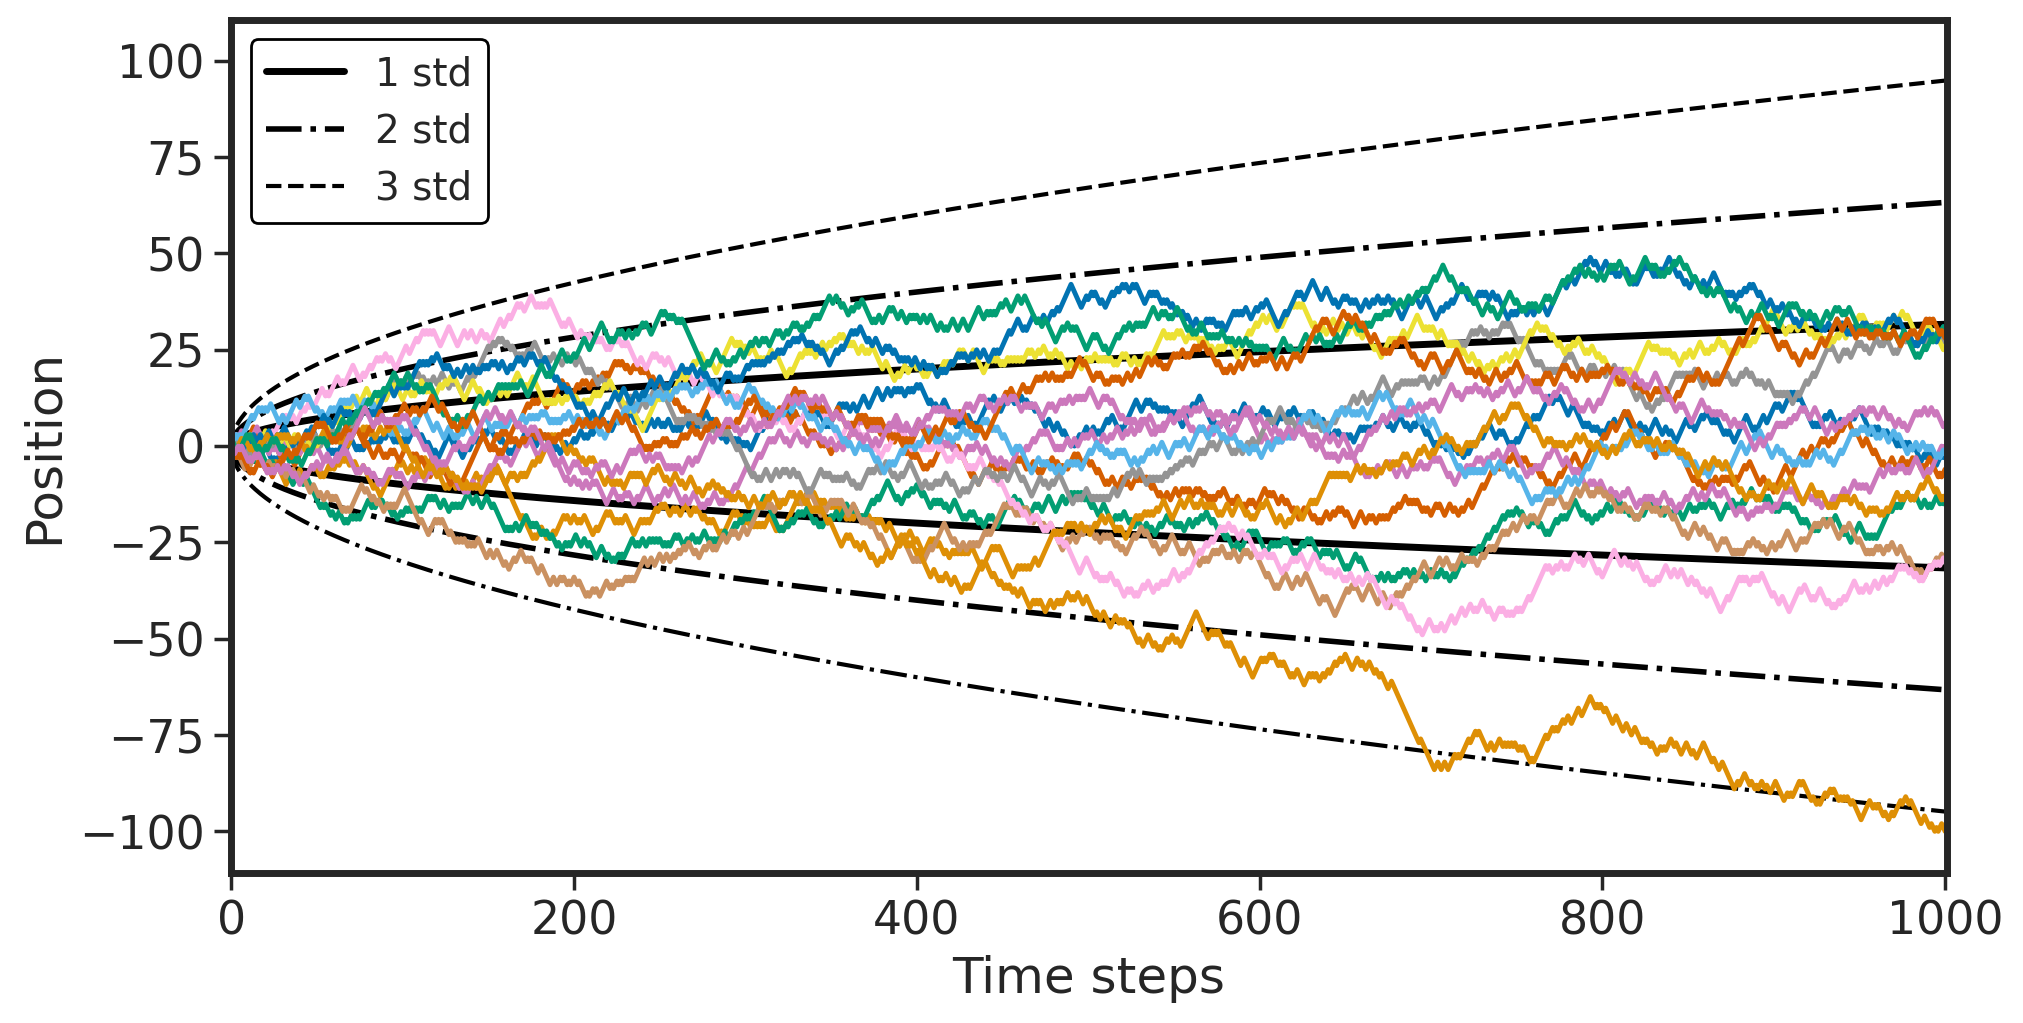

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), constrained_layout=True)

# plot 1, 2 and 3 standard deviations
t = np.arange(T)
std = np.sqrt(4*t*pp*(1-pp))
sns.lineplot(x=t, y=std, lw=2.5, color='black', alpha=1, label='1 std')
sns.lineplot(x=t, y=-std, lw=2.5, color='black', alpha=1)
sns.lineplot(x=t, y=2*std, lw=2, color='black', alpha=1, label='2 std', ls='-.')
sns.lineplot(x=t, y=-2*std, lw=2, color='black', alpha=1, ls='-.')
sns.lineplot(x=t, y=3*std, lw=1.5, color='black', alpha=1, label='3 std', ls='--')
sns.lineplot(x=t, y=-3*std, lw=1.5, color='black', alpha=1, ls='-.')

# plot the random walkers' trajectories
for index in indexes:
    sns.lineplot(x[index], lw=1.75, alpha=1)
    
ax.set_xlim(0, T)
ax.set_ylim(-std[-1]*3.5, std[-1]*3.5)
ax.set_xlabel('Time steps')
ax.set_ylabel('Position')
ax.legend(loc='upper left', fontsize=14, frameon=True, framealpha=1, edgecolor='black', facecolor='white')

plt.show()

Let's see the distribution of the position of the walkers after a few steps.

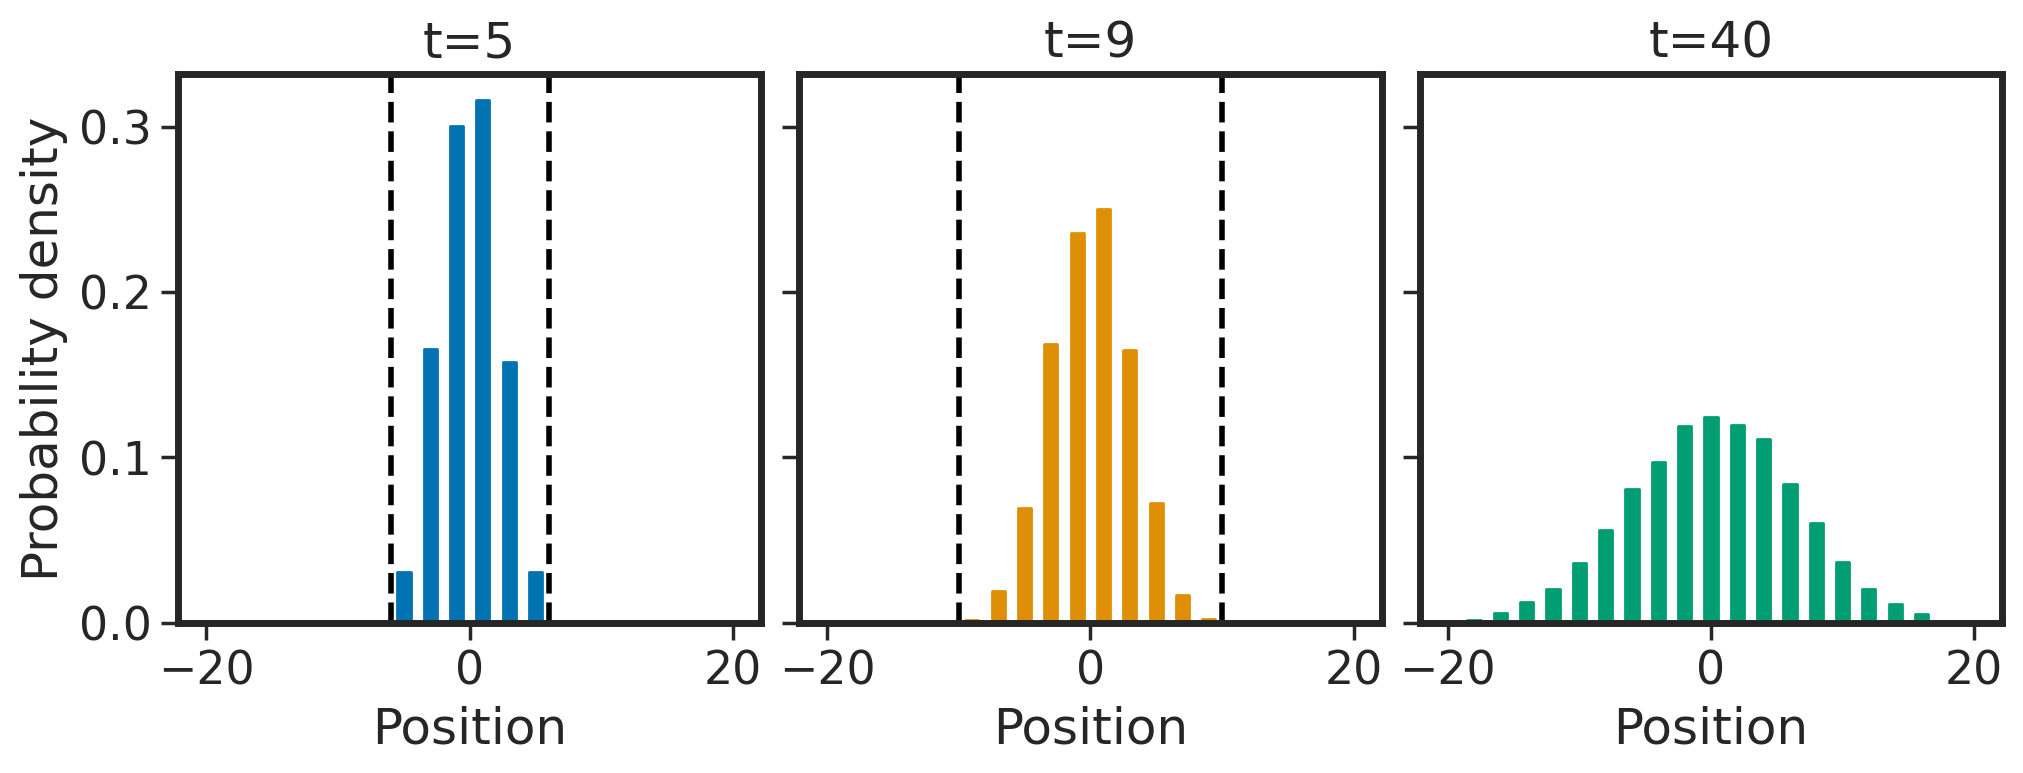

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3.75), constrained_layout=True, sharey=True)

#ts = np.array([4, 8, 12], dtype=int)
ts = np.array([5,9,40], dtype=int)
colors = sns.color_palette('colorblind', n_colors=3)

for i, ax in enumerate(axes):
    ax.set_xlim(-std[ts[-1]]*3.5, std[ts[-1]]*3.5)
    ax.set_xlabel('Position')
    ax.set_title(f't={ts[i]}')
    if i == 0:
        ax.set_ylabel('Probability density')

    # distribution of the final position
    bins = np.arange(-int(std[ts[-1]]*3), int(std[ts[-1]]*3)+1, 1)-0.5
    
    sns.histplot(x[:, ts[i]], bins=bins, stat='density', ax=ax, color=colors[i], alpha=1, element='step')
    #ax.hist(x[:, ts[i]], bins=bins, density=True, color=colors[i], alpha=1., align='right')
    
    # draw a vertical line at abs(ts[i])
    ax.axvline(x=ts[i]+1, lw=2, color='black', alpha=1, ls='--')
    ax.axvline(x=-(ts[i]+1), lw=2, color='black', alpha=1, ls='--')
    
    # gaussian distribution
    x_plot = np.linspace(-std[-1]*3.5, std[-1]*3.5, 1000)
    y_plot = np.exp(-(x_plot)**2/(2*std[ts[i]]**2))/(np.sqrt(2*np.pi)*std[ts[i]])
    #sns.lineplot(x=x_plot, y=y_plot, lw=3.5, color='firebrick', alpha=1, ax=ax)


Let's see the distribution of the position of the walkers after a larger number of steps.

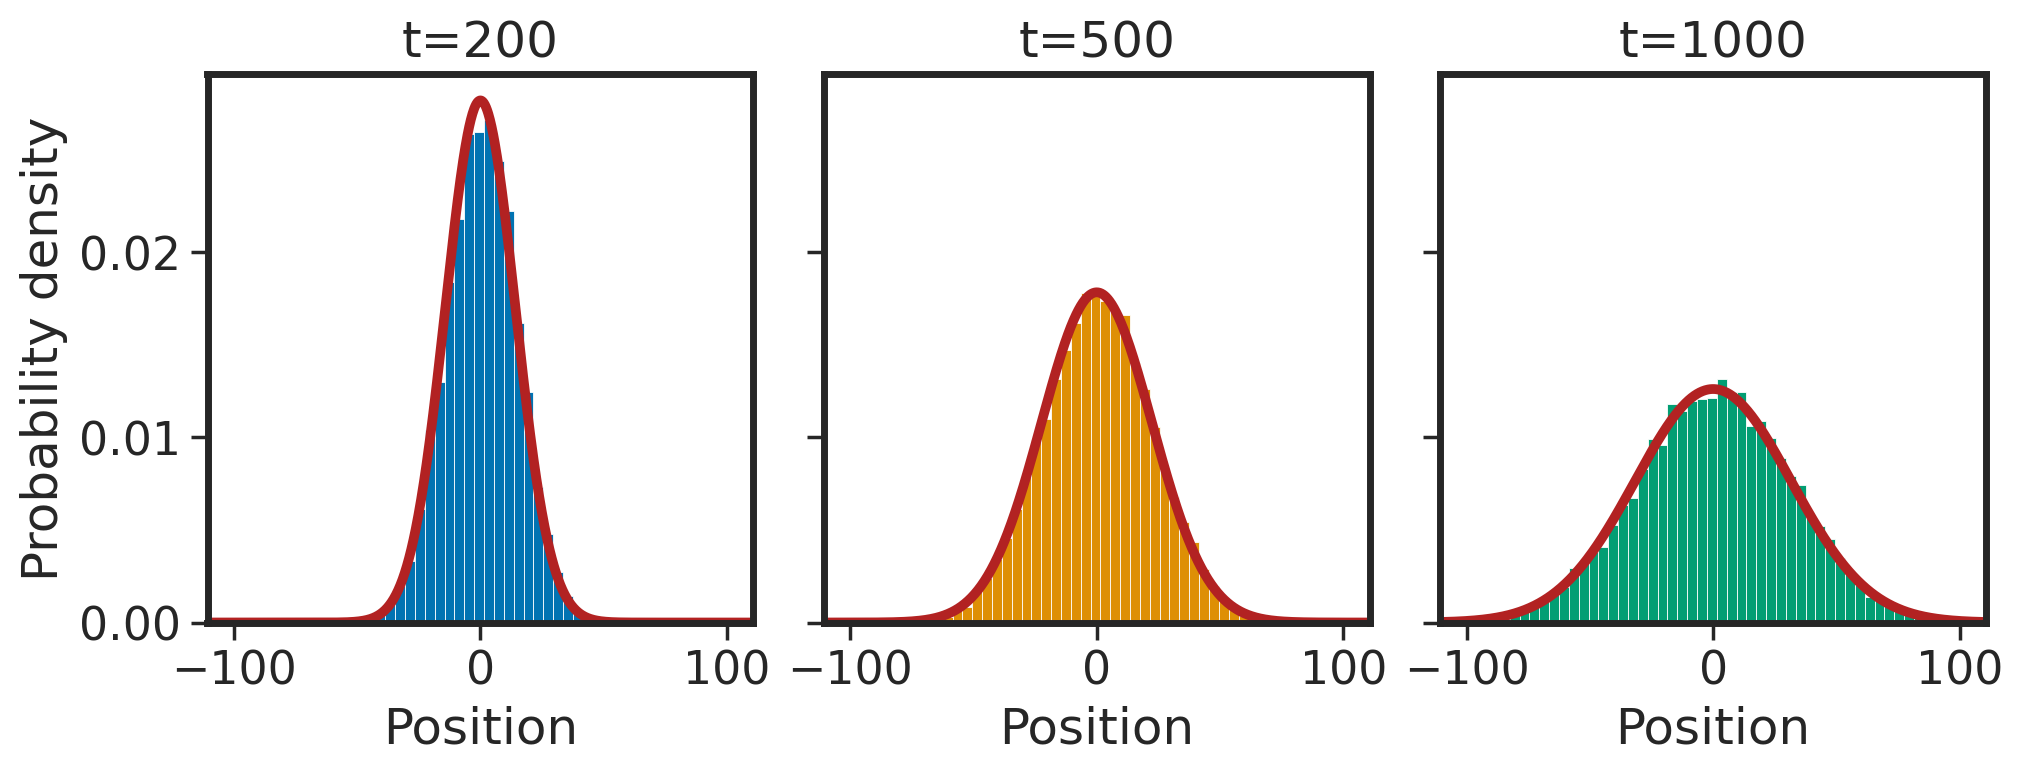

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3.75), constrained_layout=True, sharey=True)

ts = np.array([T/5, T/2, T-1], dtype=int)
colors = sns.color_palette('colorblind', n_colors=3)

for i, ax in enumerate(axes):
    ax.set_xlim(-std[-1]*3.5, std[-1]*3.5)
    ax.set_xlabel('Position')
    ax.set_title(f't={ts[i]}')
    if i == 0:
        ax.set_ylabel('Probability density')

    # distribution of the final position
    bins = np.arange(-int(std[-1]*3), int(std[-1]*3)+1, 4)-0.5
    sns.histplot(x[:, ts[i]], bins=bins, stat='density', ax=ax, color=colors[i], alpha=1)
    
    # gaussian distribution
    x_plot = np.linspace(-std[-1]*3.5, std[-1]*3.5, 1000)
    y_plot = np.exp(-(x_plot)**2/(2*std[ts[i]]**2))/(np.sqrt(2*np.pi)*std[ts[i]])
    sns.lineplot(x=x_plot, y=y_plot, lw=3.5, color='firebrick', alpha=1, ax=ax)


Let's zoom in on the distribution of the position for large values.

<Axes: title={'center': 't=200'}, xlabel='Position', ylabel='Probability density'>

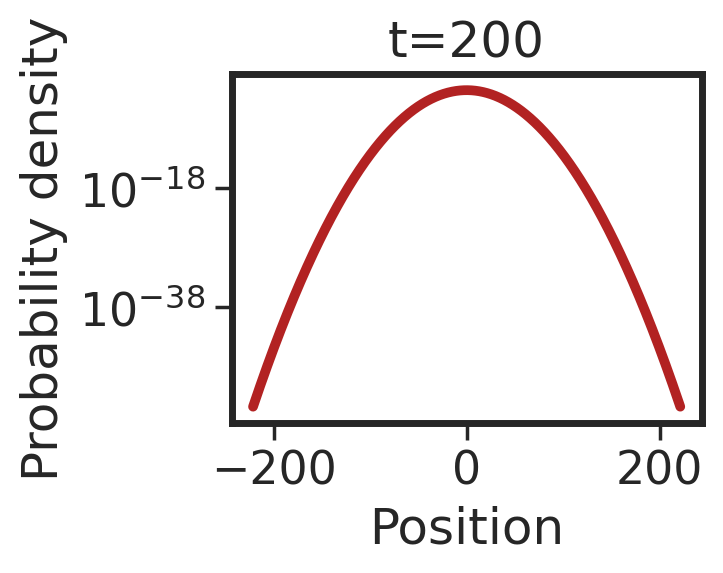

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.75), constrained_layout=True)
ax.set_xlabel('Position')
ax.set_ylabel('Probability density')
ax.set_title(f't={ts[0]}')
ax.set_yscale('log')

x_plot = np.linspace(-std[-1]*7, std[-1]*7, 1000)
y_plot = np.exp(-(x_plot)**2/(2*std[ts[0]]**2))/(np.sqrt(2*np.pi)*std[ts[0]])
sns.lineplot(x=x_plot, y=y_plot, lw=3.5, color='firebrick', alpha=1, ax=ax)

    

---
## Part 2 - Random Walks with different microscopic steps

Here we will explore the dynamics of random walks with different microscopic steps. In particular, we allow the walker to jump multiple steps at a time, and also to stay in the same position.
What do you expect to happen?

Now the probability of moving one step to right/left is $p_1$, of moving two steps to the right/left is $p_2$, and the probability of staying in the same position is $p_0=1-2 p_1 - 2 p_2$.

The initial position of each walker is $x_0$.

In [9]:
def random_walk_jumps(p1=0.25, p2=0.25, L=1000, T=1000, x0=0):
    '''
    Random walk with probability of going right/left of one step p1 and two steps p2.
    p0 = 1 - 2*p1 - 2*p2 is the probability of staying in the same position.
    L: number of walkers
    T: number of steps
    x0: initial position
    '''
    assert 1- 2*p1 - 2*p2 >=0, 'p0 must be greater or equal than 0'
    assert 0 <= p1 <= 0.5, 'p1 must be between 0 and 0.5'
    assert 0 <= p2 <= 0.5, 'p2 must be between 0 and 0.5'
    # initialize
    x = np.zeros((L, T))
    x[:, 0] = x0
    # probability rates
    ps = [p2, p1, 1-2*p1-2*p2, p1, p2]
    steps = [-2, -1, 0, 1, 2]
    # random walk
    for t in tqdm(range(1, T)):
        # random steps
        dx = np.random.choice(steps, size=L, p=ps)
        # update position
        x[:, t] = x[:, t-1] + dx
    return x

Run a simulation.

In [10]:
p1 = 0.125
p2 = 0.253
L = 10000
T = 11
x0 = 0

x_jumps = random_walk_jumps(p1=p1, p2=p2, L=L, T=T, x0=x0)

100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 3434.01it/s]


 We plot the trajectories of a given number $l$ of walkers.

In [15]:
# select l random walkers
l = 15
indexes = np.random.randint(0, L, l)

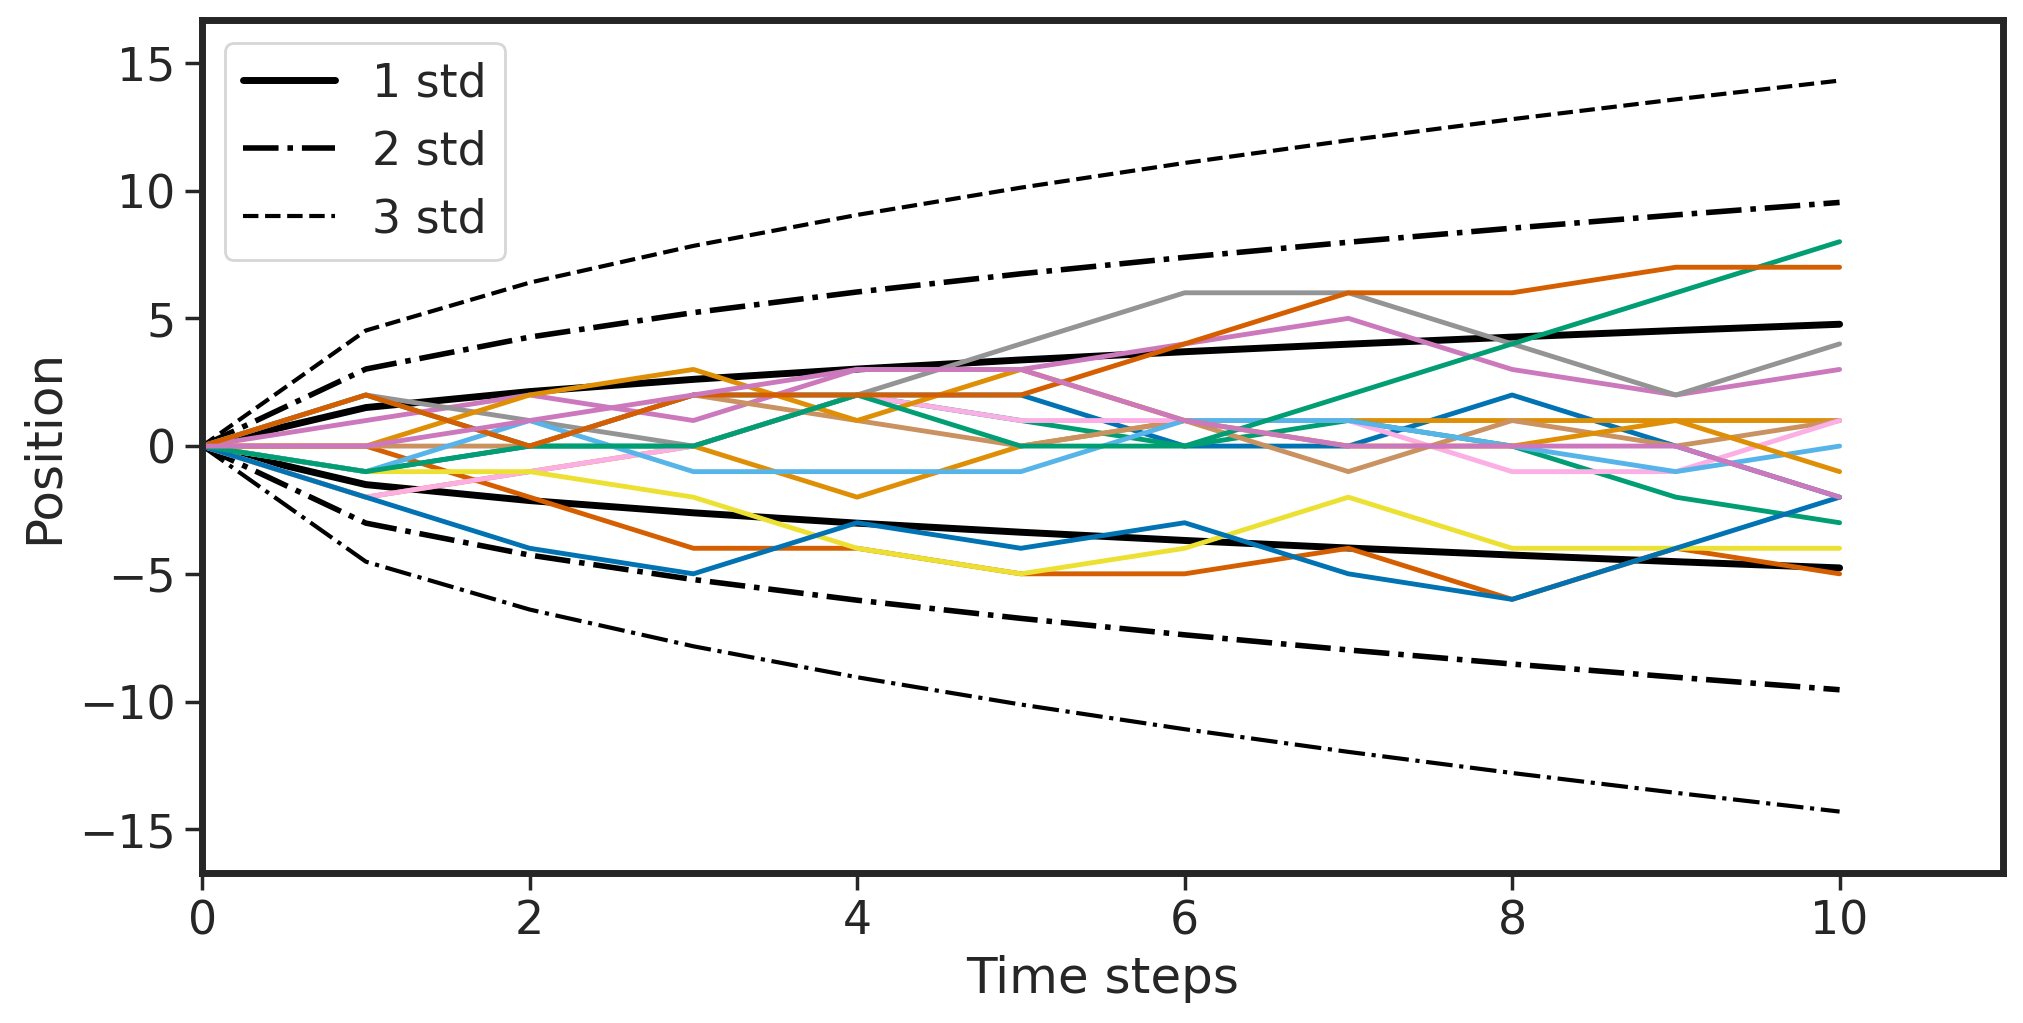

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), constrained_layout=True)

# plot 1, 2 and 3 standard deviations
t = np.arange(T)
# new formula for the std
std = np.sqrt((2*p1 + 8*p2)*t)

sns.lineplot(x=t, y=std, lw=2.5, color='black', alpha=1, label='1 std')
sns.lineplot(x=t, y=-std, lw=2.5, color='black', alpha=1)
sns.lineplot(x=t, y=2*std, lw=2, color='black', alpha=1, label='2 std', ls='-.')
sns.lineplot(x=t, y=-2*std, lw=2, color='black', alpha=1, ls='-.')
sns.lineplot(x=t, y=3*std, lw=1.5, color='black', alpha=1, label='3 std', ls='--')
sns.lineplot(x=t, y=-3*std, lw=1.5, color='black', alpha=1, ls='-.')

# plot the random walkers' trajectories
for index in indexes:
    sns.lineplot(x_jumps[index], lw=1.75, alpha=1)
    
ax.set_xlim(0, T)
ax.set_ylim(-std[-1]*3.5, std[-1]*3.5)
ax.set_xlabel('Time steps')
ax.set_ylabel('Position')
#ax.legend(loc='upper left', fontsize=14, frameon=True, framealpha=1, edgecolor='black', facecolor='white')

plt.show()

Let's see the distribution of the position of the walkers after a larger number of steps.

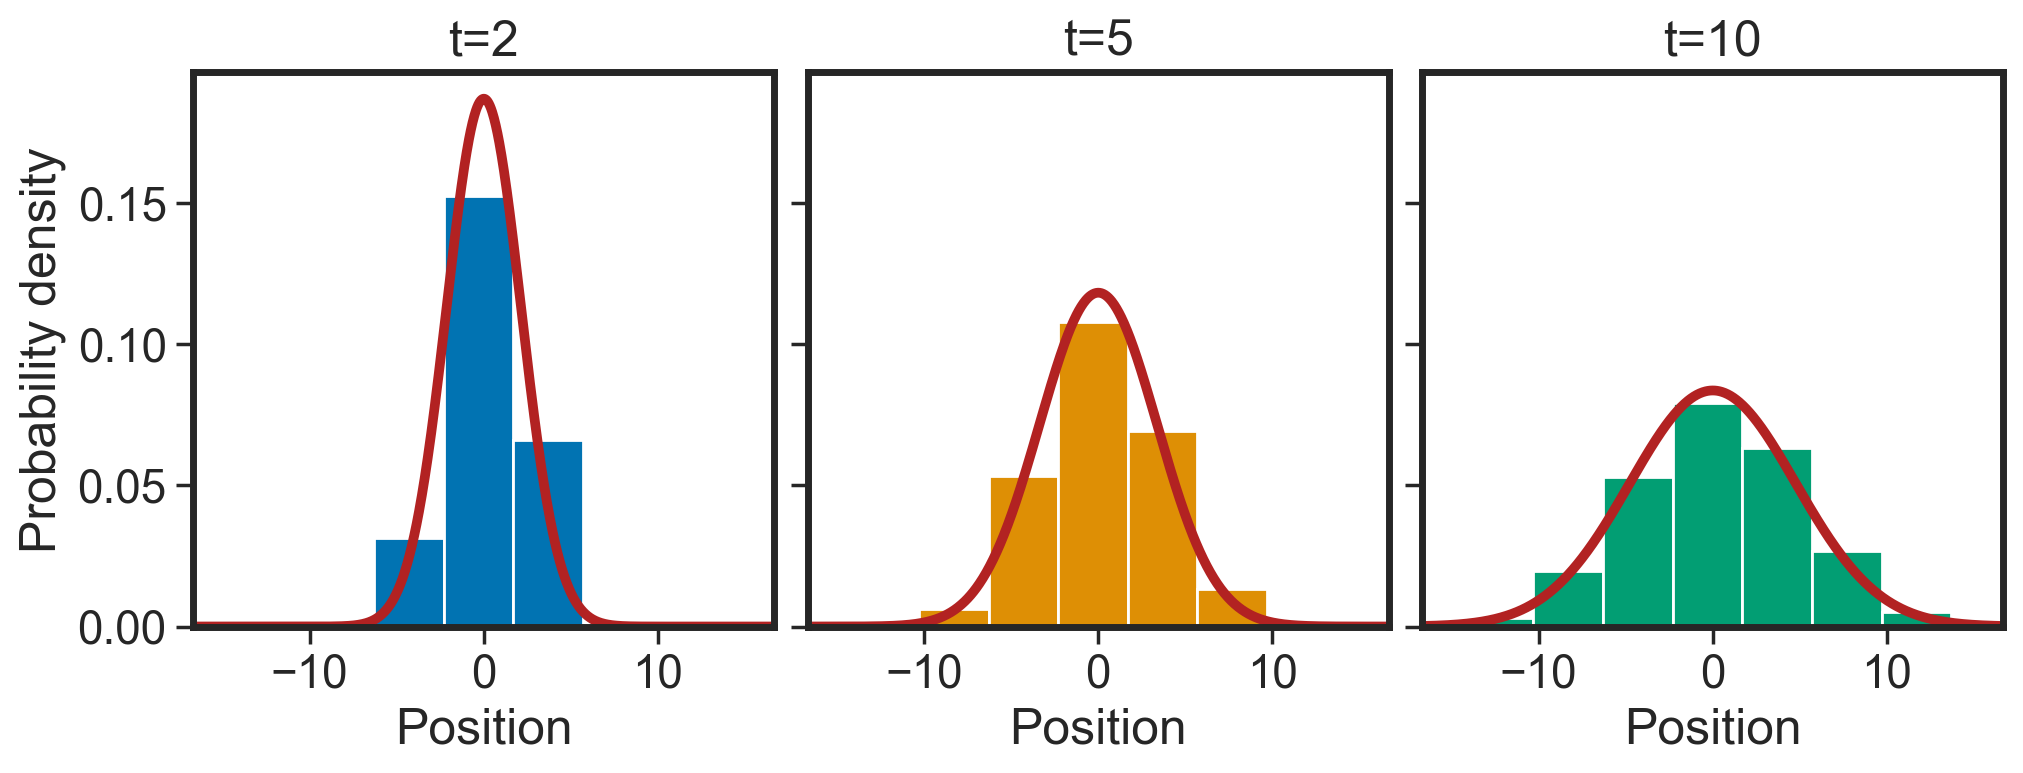

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3.75), constrained_layout=True, sharey=True)

ts = np.array([T/5, T/2, T-1], dtype=int)
colors = sns.color_palette('colorblind', n_colors=3)

for i, ax in enumerate(axes):
    ax.set_xlim(-std[-1]*3.5, std[-1]*3.5)
    ax.set_xlabel('Position')
    ax.set_title(f't={ts[i]}')
    if i == 0:
        ax.set_ylabel('Probability density')

    # distribution of the final position
    bins = np.arange(-std[-1]*3, std[-1]*3, 4)
    sns.histplot(x_jumps[:, ts[i]], bins=bins, stat='density', ax=ax, color=colors[i], alpha=1)
    
    # gaussian distribution
    x_plot = np.linspace(-std[-1]*3.5, std[-1]*3.5, 1000)
    y_plot = np.exp(-(x_plot)**2/(2*std[ts[i]]**2))/(np.sqrt(2*np.pi)*std[ts[i]])
    sns.lineplot(x=x_plot, y=y_plot, lw=3.5, color='firebrick', alpha=1, ax=ax)


## Part 3 - Random Walk in Two Dimensions

In [17]:
def random_walk_2D(ps=[0.25, 0.25, 0.25, 0.25], L=1000, T=1000, x0=np.array([0, 0])):
    '''
    Random walk in 2D with probabilities of going left/up/right/down of one step given by ps.
    ps[0,1,2,3]: probability of going left/up/right/down
    L: number of walkers
    T: number of steps
    x0: initial position
    '''
    # check if ps is a list, in case convert it to numpy array
    if type(ps) == list:
        ps = np.array(ps)
    assert np.sum(ps) == 1, 'sum of probabilities must be 1'
    assert np.all(ps >= 0), 'probabilities must be positive'
    
    # Initialize
    x = np.zeros((2, L, T), dtype=int)
    x[:, :, 0] = x0[:, np.newaxis]
    
    # Define steps for left, up, right, down
    step_choices = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
    
    # Perform the random walk
    for t in tqdm(range(1, T)):
        random_steps = np.random.choice(4, size=(L,), p=ps)
        dx = step_choices[random_steps].T
        x[:, :, t] = x[:, :, t-1] + dx
    
    return x

In [18]:
ps = [0.25, 0.25, 0.25, 0.25]
L = 100
T = 2001
walk2D = random_walk_2D(ps=ps, L=L, T=T, x0=np.array([0, 0]))

100%|██████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 37298.45it/s]


In [19]:
# select l random walkers
l = 2
indexes = np.random.randint(0, L, l)
print(indexes)

[52 60]


Text(0, 0.5, 'y')

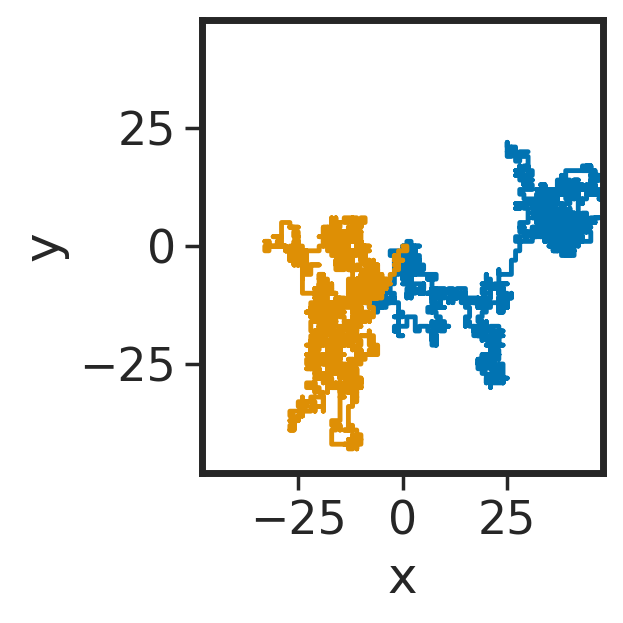

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), constrained_layout=True)

colors = sns.color_palette('colorblind', n_colors=l)
for index, color in zip(indexes, colors):
    plt.plot(walk2D[0, index, :], walk2D[1, index, :], lw=1.75, alpha=1, color=color)
    

lim = np.max(np.abs(walk2D[:, indexes, :]))
    
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_xlabel('x')
ax.set_ylabel('y')


In [21]:
ps = [0.25, 0.25, 0.25, 0.25]
L = 1000
T = 1001
walk2D = random_walk_2D(ps=ps, L=L, T=T, x0=np.array([0, 0]))

100%|██████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16823.11it/s]


In [22]:
radii = np.logspace(1, np.log10(T/100), 20)
times = []

for radius in radii:
    times.append([])
    # get at which time the radius is reached
    for walker in range(L):
        # get the x and y coordinates
        x = walk2D[0, walker, :]
        y = walk2D[1, walker, :]
        # get the distance from the origin
        dist = np.sqrt(x**2 + y**2)
        # get the first time the radius is reached
        try:
            t = np.where(dist > radius)[0][0]
            # plot a circle
            times[-1].append(t)
        except:
            times[-1].append(np.nan)

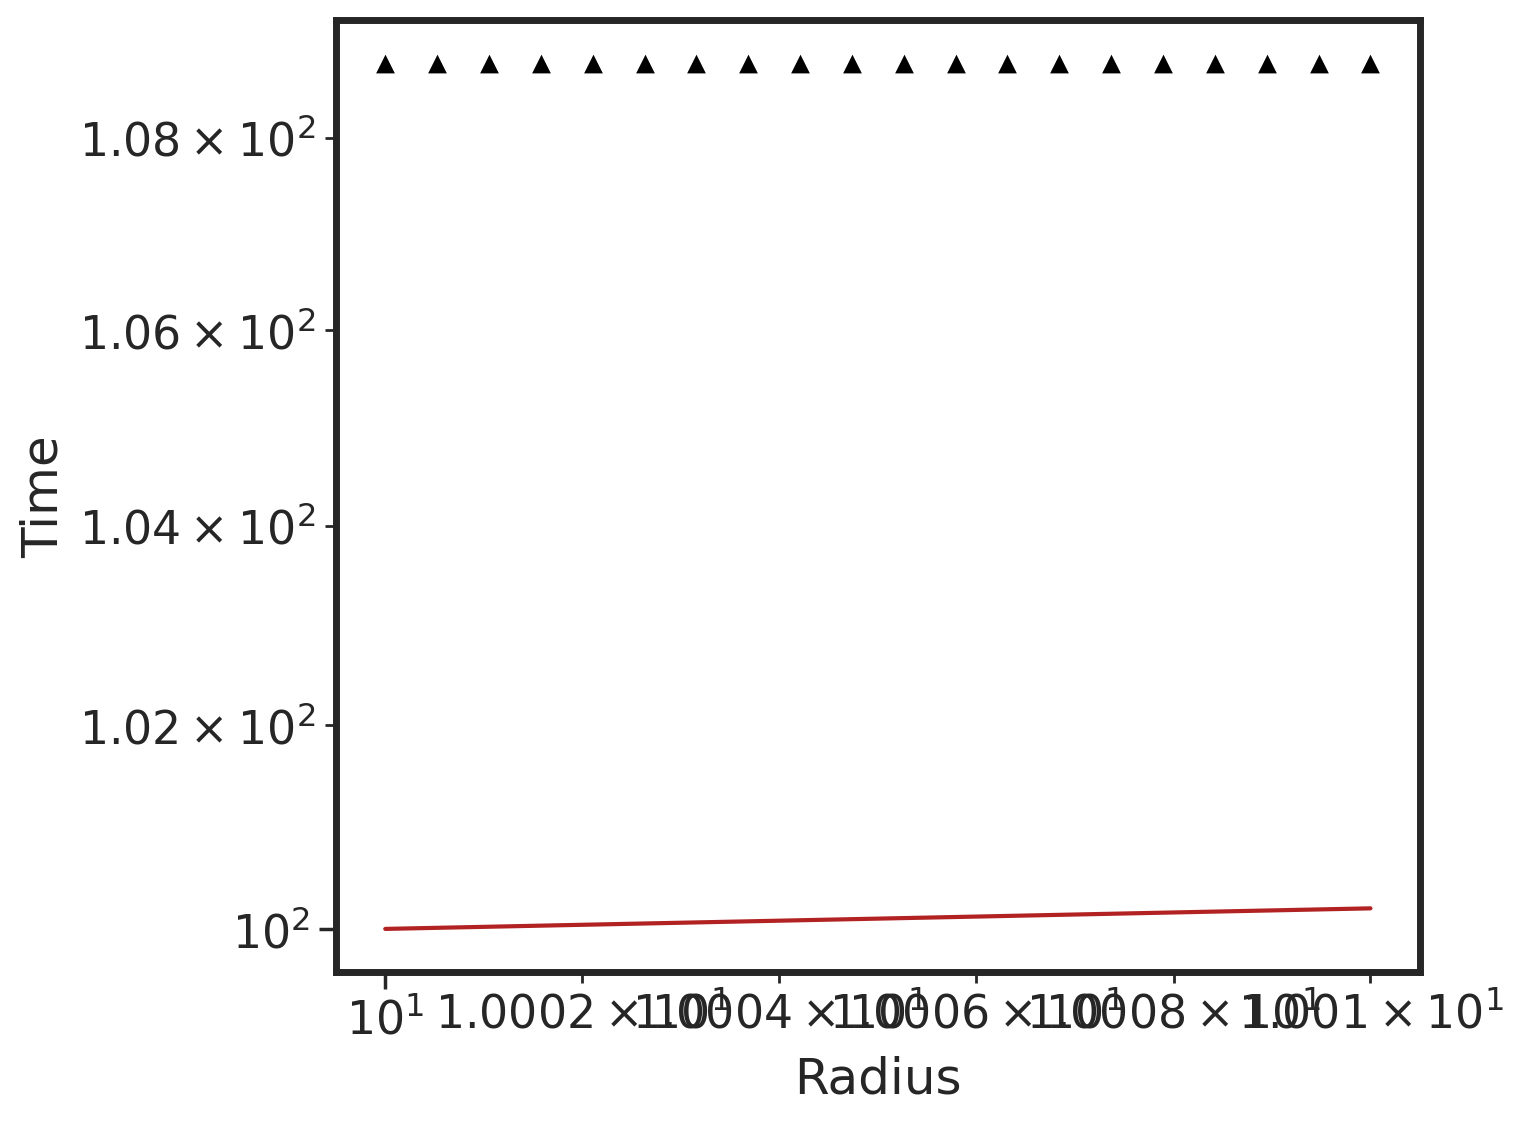

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5.5), constrained_layout=True)

sns.scatterplot(x=radii, y=np.mean(times, axis=1), s=60, marker='^', color='black', alpha=1)
x_plot = radii[np.mean(times, axis=1) > 0]
y_plot = x_plot**2
sns.lineplot(x=x_plot, y=y_plot, lw=1.5, color='firebrick', alpha=1, zorder=-1)

ax.set_xlabel('Radius')
ax.set_ylabel('Time')
ax.set_xscale('log')
ax.set_yscale('log')

What is the distribution of random walkers in 2D?

In [33]:
ps = [0.25, 0.25, 0.25, 0.25]
L = 1000
T = 1001
walk2D_single = random_walk_2D(ps=ps, L=L, T=T, x0=np.array([0, 0]))

100%|██████████| 1000/1000 [00:00<00:00, 4486.78it/s]


In [34]:
minx = np.min(walk2D_single[0, :, :])
maxx = np.max(walk2D_single[0, :, :])
miny = np.min(walk2D_single[1, :, :])
maxy = np.max(walk2D_single[1, :, :])

maxx = np.max((np.abs(minx), np.abs(maxx)))
maxy = np.max((np.abs(miny), np.abs(maxy)))

step_size = 20
plot_frames = np.arange(0,T-1,step_size)

counts_2D = np.zeros((len(plot_frames),2*maxx+1, 2*maxy+1))

for t in tqdm(range(len(plot_frames))):
    for i in range(step_size):
        for k in range(L):
            x = walk2D_single[0, k, t*step_size + i]
            y = walk2D_single[1, k, t*step_size + i]
            counts_2D[t,x+maxx, y+maxy] += 1
        
nonzeroids = np.where(counts_2D > 0)
logged_counts2D = np.zeros(counts_2D.shape)
logged_counts2D[nonzeroids] = np.log(counts_2D[nonzeroids])

100%|██████████| 50/50 [00:01<00:00, 26.97it/s]


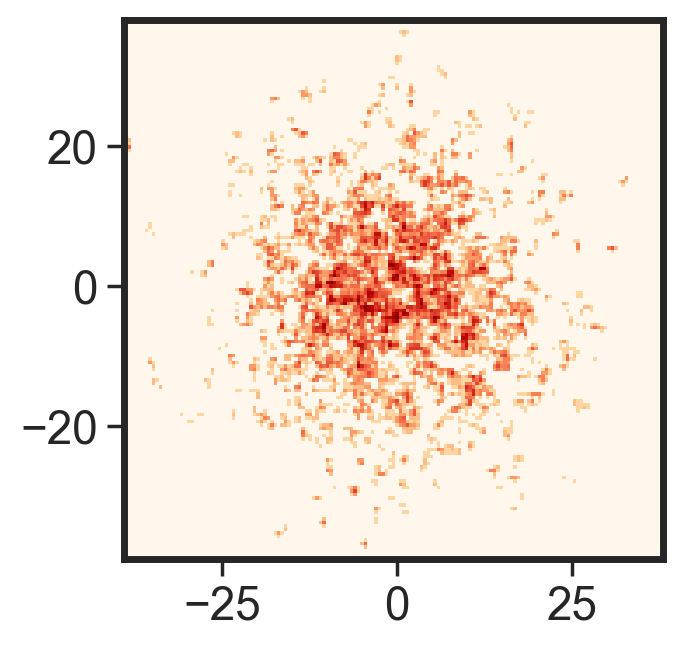

In [35]:
plt.close('all')
plt.imshow(logged_counts2D[-1,:,:], cmap='OrRd', origin='lower',extent=[-maxx//2,maxx//2,-maxy//2,maxy//2],vmin=0,vmax=3)
# plt.colorbar()
plt.show()

In [ ]:
plt.close('all')
fig, axes = plt.subplots(1,2,figsize=(12,5), constrained_layout=True)

ax = axes[0]
ax1 = axes[1]
ax.set_xlim(-maxx//2, maxx//2)
ax.set_ylim(-maxy//2, maxy//2)

lines = []

for i in range(10):
    line, = ax.plot(walk2D_single[0,i,:step_size], walk2D_single[1,i,:step_size], alpha=0.5,linewidth=2)
    lines.append(line)

im = ax1.imshow(logged_counts2D[0,:,:], origin='lower', cmap='OrRd', interpolation='nearest', aspect='auto', extent=[-maxx//2,maxx//2,-maxy//2,maxy//2],vmin=0,vmax=5)

lines.append(im)


def update(frameid):
    frame = plot_frames[frameid]
    for i in range(10):
        line = lines[i]
        x = walk2D_single[0,i,frame-step_size//2:frame+step_size//2]
        y = walk2D_single[1,i,frame-step_size//2:frame+step_size//2]
        line.set_xdata(x[:frame])
        line.set_ydata(y[:frame])

    lines[-1].set_array(logged_counts2D[frameid,:,:])

    return lines


ani = animation.FuncAnimation(fig=fig, func=update, frames=counts_2D.shape[0], interval=20)
ani.save('random_walk_2D.mp4', writer='ffmpeg', fps=20, dpi=100)